In [63]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
kkk = 1

In [64]:
def g(x):
    return np.e**(-2*np.sin(2*x)) + 2*np.cos(2*x)
a = -np.pi
b = 2 * np.pi

In [65]:
def fun_painter(func, names, points = None, title=None):
    global kkk
    plt.figure()
    plt.grid()
    plt.xlabel('x')
    plt.ylabel('y')
    for i in range(len(func)):
        x = np.linspace(a, b, 1000)
        y = func[i](x)
        plt.plot(x, y, label=names[i])
    plt.legend()
    if title is not None:
        plt.title(title)
    if points is not None:
        plt.plot(points[0], points[1], marker='o', linestyle='')
    name = "obrazek" + str(kkk) + ".png"
    plt.savefig(name,bbox_inches='tight')
    kkk+=1
    plt.show()

In [66]:
def generate_regular(a, b, f, n):
    x = np.linspace(a, b, n)
    y = f(x)
    return x, y

thousand_test_points = np.linspace(a, b, 1000) 

In [67]:
def max_diff(p, f=g, points=thousand_test_points):
    res = 0
    for i in points:
        res = max(res, abs(f(i) - p(i)))
    return res

In [68]:
def sum_diff(p, f=g, points=thousand_test_points):
    res = 0
    for i in points:
        res += (f(i) - p(i)) ** 2
    return res / len(points)

In [69]:
def approx(xs, ys, m):
    
    n = len(xs)
    w = [1] * n
    
    G = np.zeros((m+1, m+1))
    B = np.zeros(m+1)
    
    for i in range(m+1):
        for j in range(m+1):
            for k in range(n):
                G[i][j] += w[k] * xs[k] ** (i + j)
            
        for j in range(n):
            B[i] += w[j] * xs[j] ** i * ys[j]
            
    A = np.linalg.solve(G, B)
    
    def f(x):
        y = 0
        for i in range(m+1):
            y += A[i] * x ** i
        return y
            
    return f

In [70]:
def generate_summary(n, m_list):
    x_nodes, y_nodes = generate_regular(a, b, g, n)

    print("------------------------------APROKSYMACJA------------------------------")
    print(f"Wyniki aproksymacji dla {n} węzłów:")

    latex_rows = ""

    for m in m_list:
        f = approx(x_nodes, y_nodes, m)

        max_diff_f = max_diff(f, f=g, points=thousand_test_points)
        sum_diff_f = sum_diff(f, f=g, points=thousand_test_points)

        print(f"Dla m = {m}:")
        print(f"Maksymalna różnica: {max_diff_f}")
        print(f"Błąd średni kwadratowy: {sum_diff_f}")
        print("----------------------------------------------------------------------")

        latex_rows += f"{m} & {max_diff_f:.4f} & {sum_diff_f:.4f} \\\\\n"

        fun_painter([g, f], ['f(x)', 'Aproksymacja'], points=(x_nodes, y_nodes), title=f"Aproksymacja dla m={m} i {n} węzłów")

    latex_code = f"""
\\noindent\\begin{{minipage}}{{\\linewidth}}
\\centering
\\begin{{table}}[H]
\\centering
\\begin{{tabular}}{{c|c|c}}
       m           & Maksymalna różnica & Średni błąd kwadratowy  \\\\
\\hline
{latex_rows}
\\end{{tabular}}
\\captionsetup{{justification=centering}}
\\caption{{Porównanie błędów i maksymalnych różnic dla aproksymacji wielomianowej dla różnych wartości m przy {n} węzłach.}}
\\end{{table}}
\\end{{minipage}}
"""
    print(latex_code)

------------------------------APROKSYMACJA------------------------------
Wyniki aproksymacji dla 5 węzłów:
Dla m = 2:
Maksymalna różnica: 6.147341597784493
Błąd średni kwadratowy: 9.908956300520462
----------------------------------------------------------------------


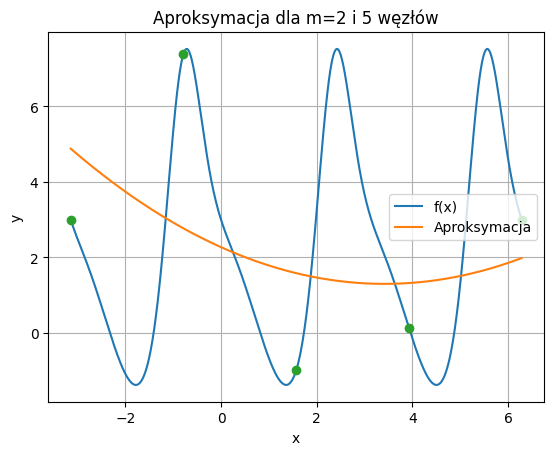

Dla m = 3:
Maksymalna różnica: 7.605355305896465
Błąd średni kwadratowy: 15.828235072250992
----------------------------------------------------------------------


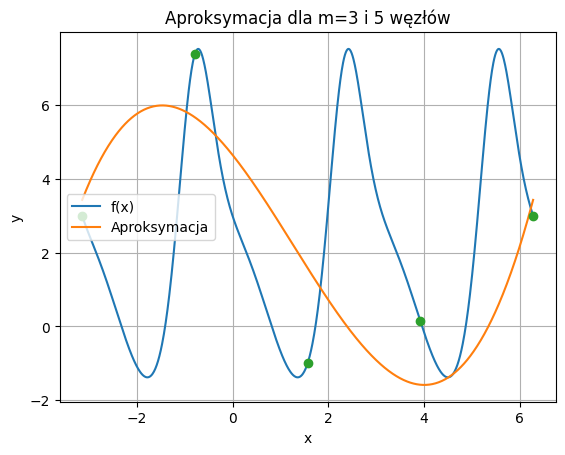

Dla m = 4:
Maksymalna różnica: 10.821967715860445
Błąd średni kwadratowy: 23.67560551414442
----------------------------------------------------------------------


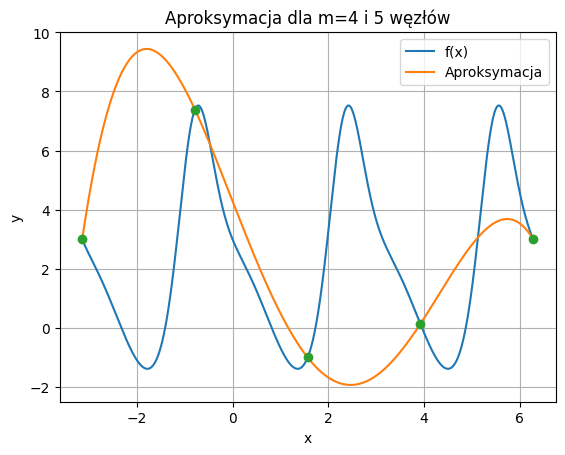

Dla m = 5:
Maksymalna różnica: 11.449834002769851
Błąd średni kwadratowy: 25.270855859111336
----------------------------------------------------------------------


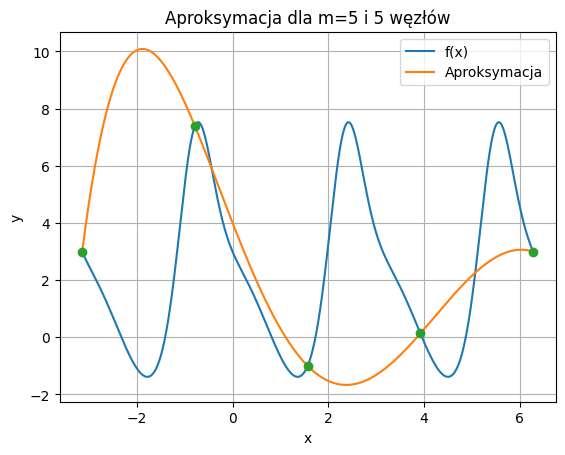


\noindent\begin{minipage}{\linewidth}
\centering
\begin{table}[H]
\centering
\begin{tabular}{c|c|c}
       m           & Maksymalna różnica & Średni błąd kwadratowy  \\
\hline
2 & 6.1473 & 9.9090 \\
3 & 7.6054 & 15.8282 \\
4 & 10.8220 & 23.6756 \\
5 & 11.4498 & 25.2709 \\

\end{tabular}
\captionsetup{justification=centering}
\caption{Porównanie błędów i maksymalnych różnic dla aproksymacji wielomianowej dla różnych wartości m przy 5 węzłach.}
\end{table}
\end{minipage}


In [71]:
generate_summary(5, [2, 3, 4, 5])

------------------------------APROKSYMACJA------------------------------
Wyniki aproksymacji dla 10 węzłów:
Dla m = 3:
Maksymalna różnica: 5.391373108171042
Błąd średni kwadratowy: 7.734593577649011
----------------------------------------------------------------------


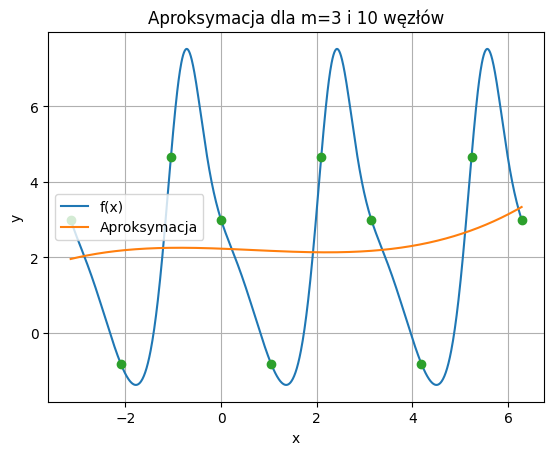

Dla m = 5:
Maksymalna różnica: 5.726910543376109
Błąd średni kwadratowy: 7.334451204908883
----------------------------------------------------------------------


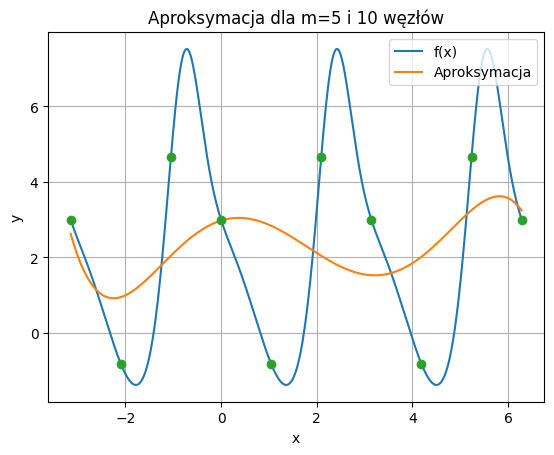

Dla m = 7:
Maksymalna różnica: 7.12189361055264
Błąd średni kwadratowy: 6.768116146578249
----------------------------------------------------------------------


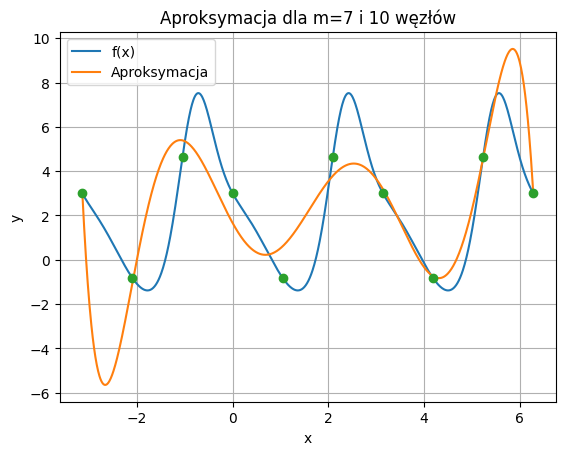

Dla m = 9:
Maksymalna różnica: 9.130734296646448
Błąd średni kwadratowy: 8.412688429450656
----------------------------------------------------------------------


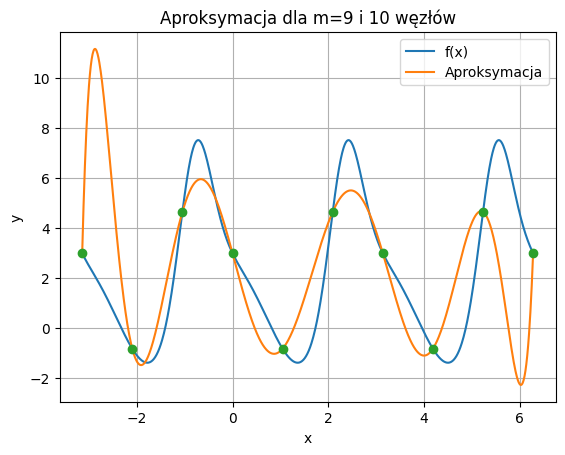


\noindent\begin{minipage}{\linewidth}
\centering
\begin{table}[H]
\centering
\begin{tabular}{c|c|c}
       m           & Maksymalna różnica & Średni błąd kwadratowy  \\
\hline
3 & 5.3914 & 7.7346 \\
5 & 5.7269 & 7.3345 \\
7 & 7.1219 & 6.7681 \\
9 & 9.1307 & 8.4127 \\

\end{tabular}
\captionsetup{justification=centering}
\caption{Porównanie błędów i maksymalnych różnic dla aproksymacji wielomianowej dla różnych wartości m przy 10 węzłach.}
\end{table}
\end{minipage}


In [72]:
generate_summary(10, [3, 5, 7, 9])

------------------------------APROKSYMACJA------------------------------
Wyniki aproksymacji dla 15 węzłów:
Dla m = 3:
Maksymalna różnica: 5.512895104492686
Błąd średni kwadratowy: 7.486583126997134
----------------------------------------------------------------------


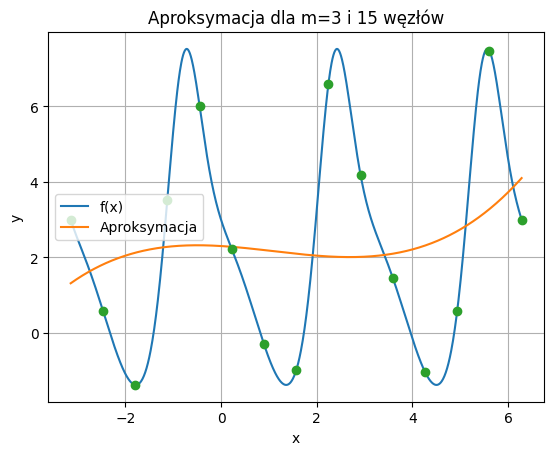

Dla m = 6:
Maksymalna różnica: 5.6879950258072505
Błąd średni kwadratowy: 7.149551295972466
----------------------------------------------------------------------


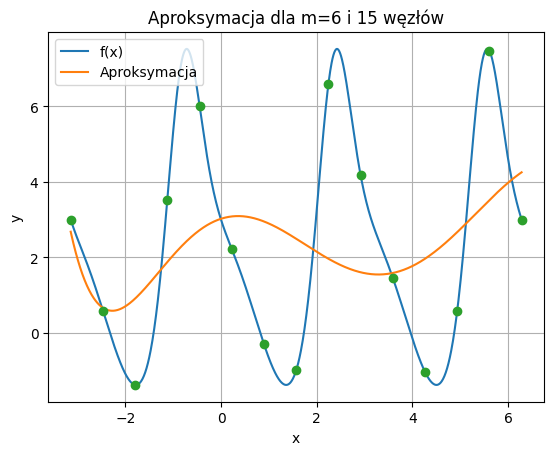

Dla m = 10:
Maksymalna różnica: 3.7845659778027443
Błąd średni kwadratowy: 1.5605000397289064
----------------------------------------------------------------------


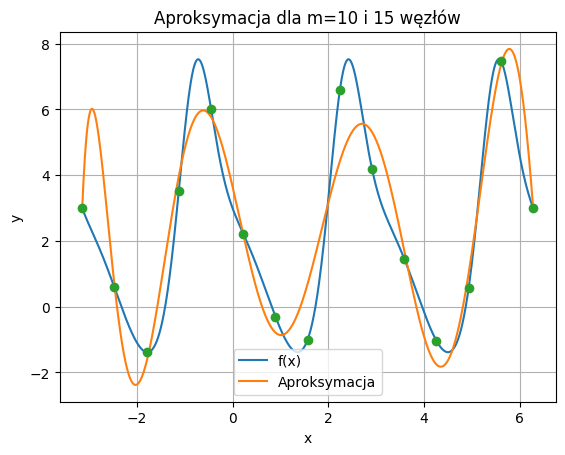

Dla m = 13:
Maksymalna różnica: 21.35194960537771
Błąd średni kwadratowy: 15.791276204771123
----------------------------------------------------------------------


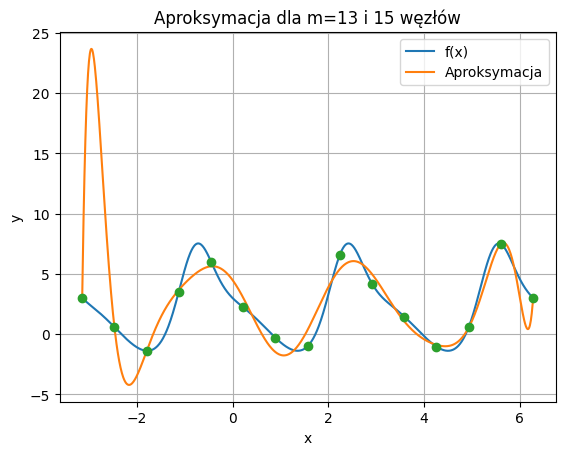


\noindent\begin{minipage}{\linewidth}
\centering
\begin{table}[H]
\centering
\begin{tabular}{c|c|c}
       m           & Maksymalna różnica & Średni błąd kwadratowy  \\
\hline
3 & 5.5129 & 7.4866 \\
6 & 5.6880 & 7.1496 \\
10 & 3.7846 & 1.5605 \\
13 & 21.3519 & 15.7913 \\

\end{tabular}
\captionsetup{justification=centering}
\caption{Porównanie błędów i maksymalnych różnic dla aproksymacji wielomianowej dla różnych wartości m przy 15 węzłach.}
\end{table}
\end{minipage}


In [73]:
generate_summary(15, [3, 6, 10, 13])

------------------------------APROKSYMACJA------------------------------
Wyniki aproksymacji dla 20 węzłów:
Dla m = 3:
Maksymalna różnica: 5.542229958154393
Błąd średni kwadratowy: 7.415335440186527
----------------------------------------------------------------------


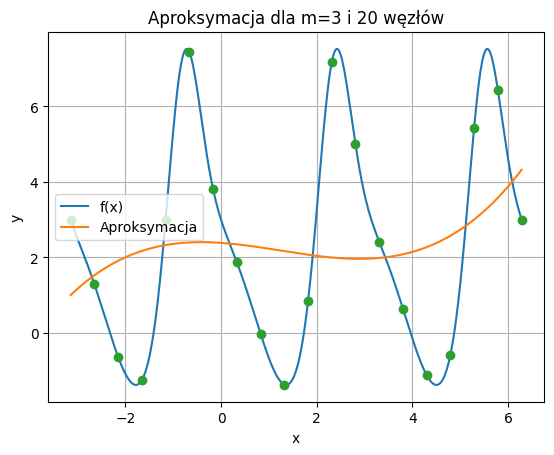

Dla m = 6:
Maksymalna różnica: 5.702453393673493
Błąd średni kwadratowy: 7.072713269242448
----------------------------------------------------------------------


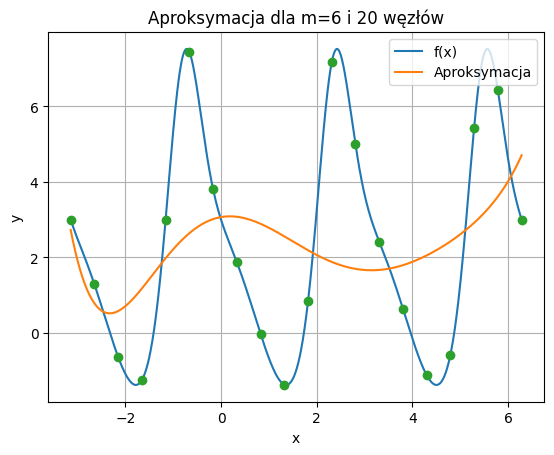

Dla m = 11:
Maksymalna różnica: 2.0552084662120347
Błąd średni kwadratowy: 0.8719784886797408
----------------------------------------------------------------------


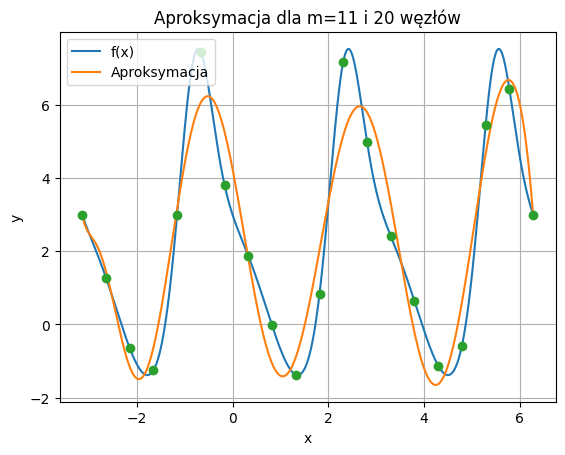

Dla m = 15:
Maksymalna różnica: 18.580548775046964
Błąd średni kwadratowy: 11.033372790504101
----------------------------------------------------------------------


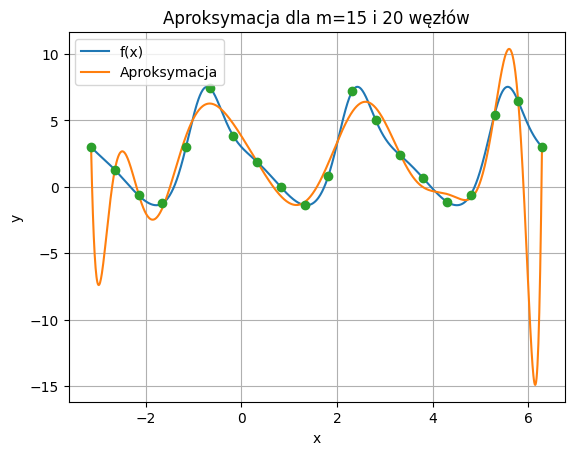


\noindent\begin{minipage}{\linewidth}
\centering
\begin{table}[H]
\centering
\begin{tabular}{c|c|c}
       m           & Maksymalna różnica & Średni błąd kwadratowy  \\
\hline
3 & 5.5422 & 7.4153 \\
6 & 5.7025 & 7.0727 \\
11 & 2.0552 & 0.8720 \\
15 & 18.5805 & 11.0334 \\

\end{tabular}
\captionsetup{justification=centering}
\caption{Porównanie błędów i maksymalnych różnic dla aproksymacji wielomianowej dla różnych wartości m przy 20 węzłach.}
\end{table}
\end{minipage}


In [74]:
generate_summary(20, [3, 6, 11, 15])

------------------------------APROKSYMACJA------------------------------
Wyniki aproksymacji dla 30 węzłów:
Dla m = 4:
Maksymalna różnica: 5.405464471937828
Błąd średni kwadratowy: 7.123570966596102
----------------------------------------------------------------------


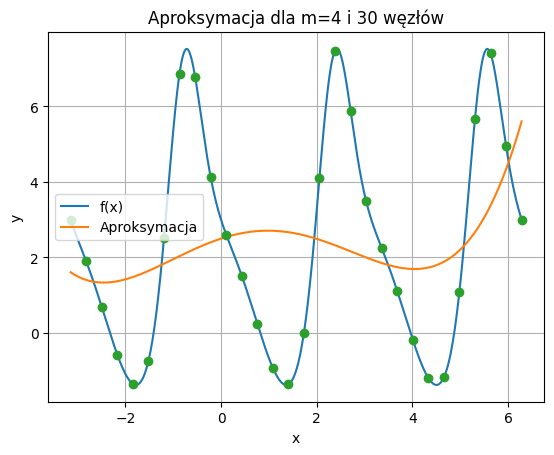

Dla m = 6:
Maksymalna różnica: 5.676048248028746
Błąd średni kwadratowy: 6.994174417545698
----------------------------------------------------------------------


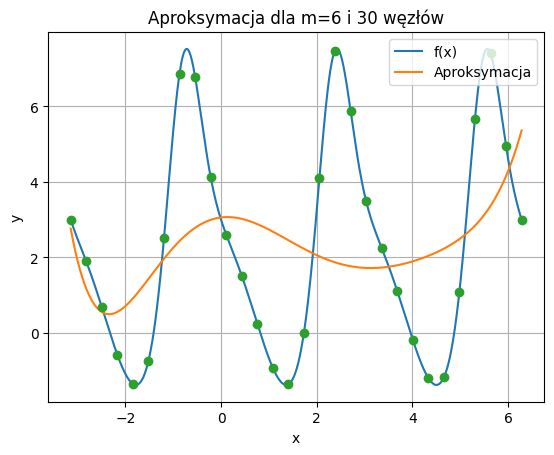

Dla m = 11:
Maksymalna różnica: 2.1092023014463646
Błąd średni kwadratowy: 0.8437163785456276
----------------------------------------------------------------------


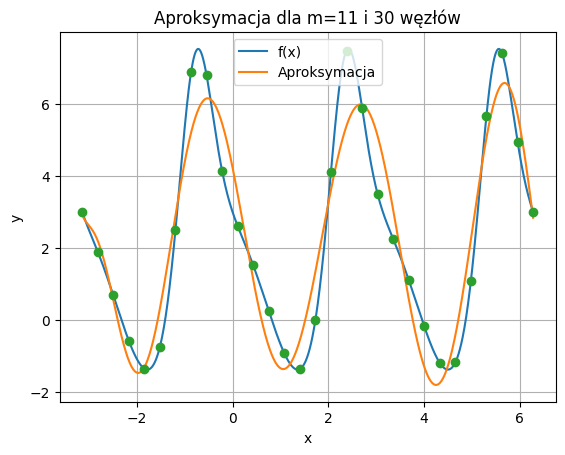

Dla m = 24:
Maksymalna różnica: 40.9339056037019
Błąd średni kwadratowy: 25.277250737412206
----------------------------------------------------------------------


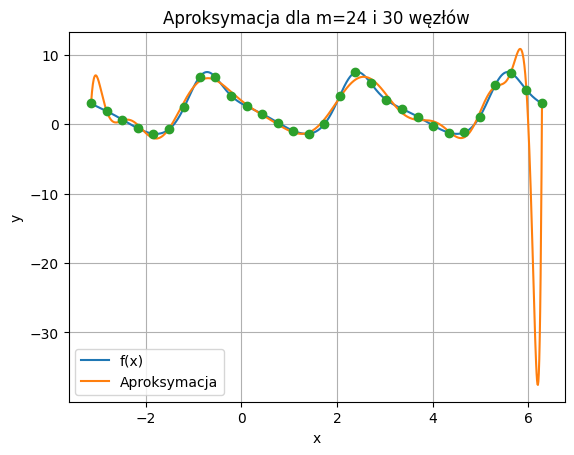


\noindent\begin{minipage}{\linewidth}
\centering
\begin{table}[H]
\centering
\begin{tabular}{c|c|c}
       m           & Maksymalna różnica & Średni błąd kwadratowy  \\
\hline
4 & 5.4055 & 7.1236 \\
6 & 5.6760 & 6.9942 \\
11 & 2.1092 & 0.8437 \\
24 & 40.9339 & 25.2773 \\

\end{tabular}
\captionsetup{justification=centering}
\caption{Porównanie błędów i maksymalnych różnic dla aproksymacji wielomianowej dla różnych wartości m przy 30 węzłach.}
\end{table}
\end{minipage}


In [75]:
generate_summary(30, [4, 6, 11, 24])

------------------------------APROKSYMACJA------------------------------
Wyniki aproksymacji dla 50 węzłów:
Dla m = 4:
Maksymalna różnica: 5.3731102621744276
Błąd średni kwadratowy: 7.077005592847455
----------------------------------------------------------------------


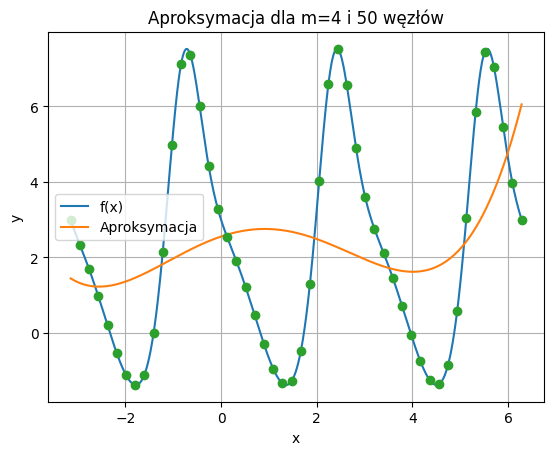

Dla m = 7:
Maksymalna różnica: 4.01128481080536
Błąd średni kwadratowy: 4.23861607724015
----------------------------------------------------------------------


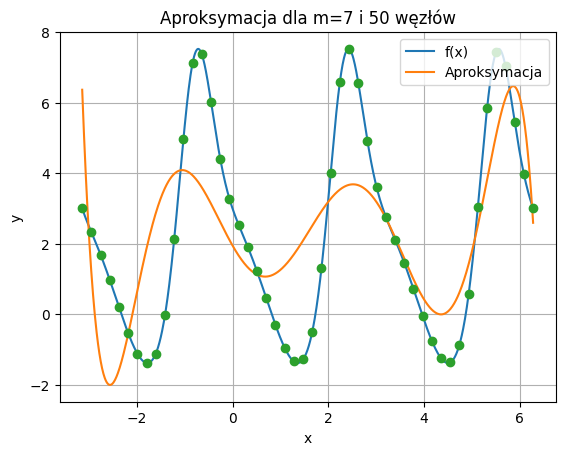

Dla m = 12:
Maksymalna różnica: 2.284715829517344
Błąd średni kwadratowy: 0.7525578670431011
----------------------------------------------------------------------


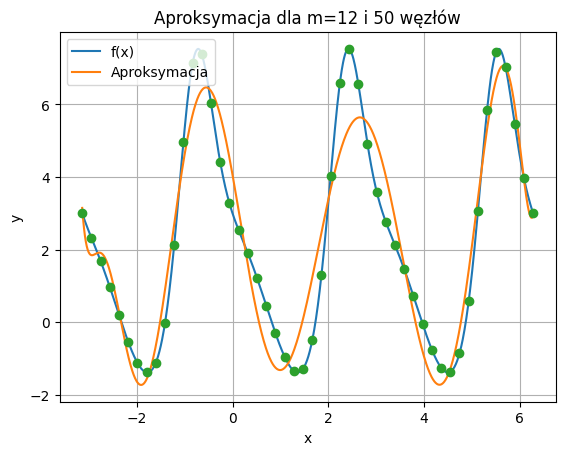

Dla m = 24:
Maksymalna różnica: 11.508138515466113
Błąd średni kwadratowy: 2.2773024625194287
----------------------------------------------------------------------


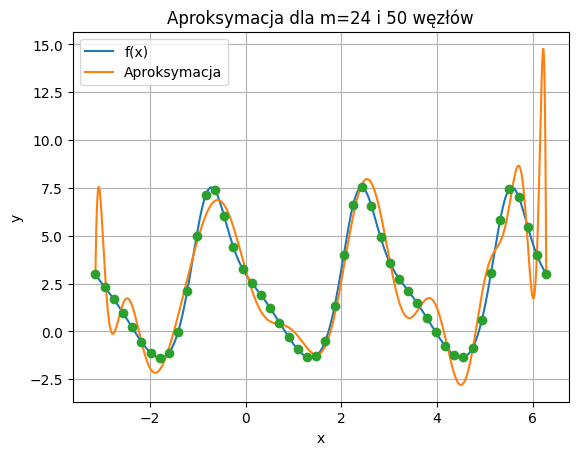


\noindent\begin{minipage}{\linewidth}
\centering
\begin{table}[H]
\centering
\begin{tabular}{c|c|c}
       m           & Maksymalna różnica & Średni błąd kwadratowy  \\
\hline
4 & 5.3731 & 7.0770 \\
7 & 4.0113 & 4.2386 \\
12 & 2.2847 & 0.7526 \\
24 & 11.5081 & 2.2773 \\

\end{tabular}
\captionsetup{justification=centering}
\caption{Porównanie błędów i maksymalnych różnic dla aproksymacji wielomianowej dla różnych wartości m przy 50 węzłach.}
\end{table}
\end{minipage}


In [76]:
generate_summary(50, [4, 7, 12, 24])

------------------------------APROKSYMACJA------------------------------
Wyniki aproksymacji dla 100 węzłów:
Dla m = 5:
Maksymalna różnica: 5.466973338151339
Błąd średni kwadratowy: 7.042291127883079
----------------------------------------------------------------------


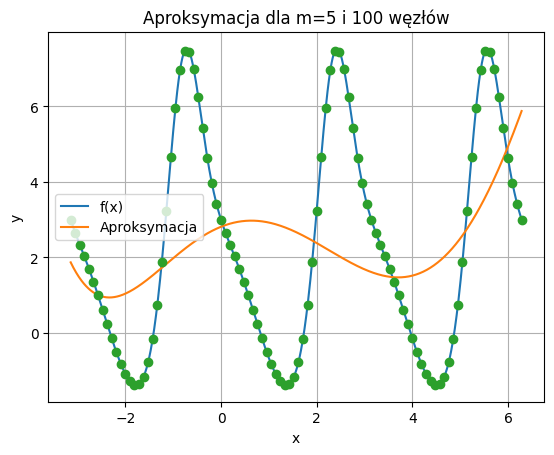

Dla m = 8:
Maksymalna różnica: 4.490292168504312
Błąd średni kwadratowy: 2.5151112699541023
----------------------------------------------------------------------


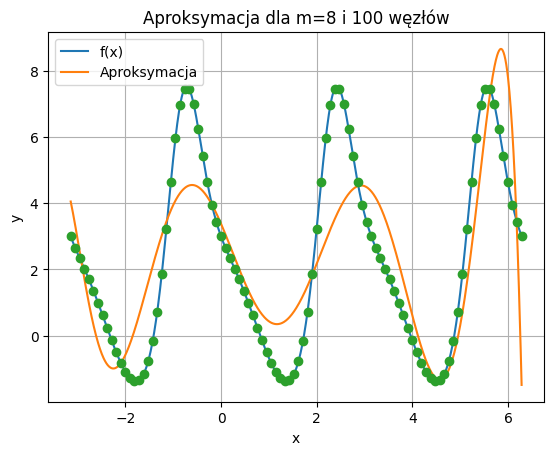

Dla m = 15:
Maksymalna różnica: 2.0017658858186502
Błąd średni kwadratowy: 0.6929068719120635
----------------------------------------------------------------------


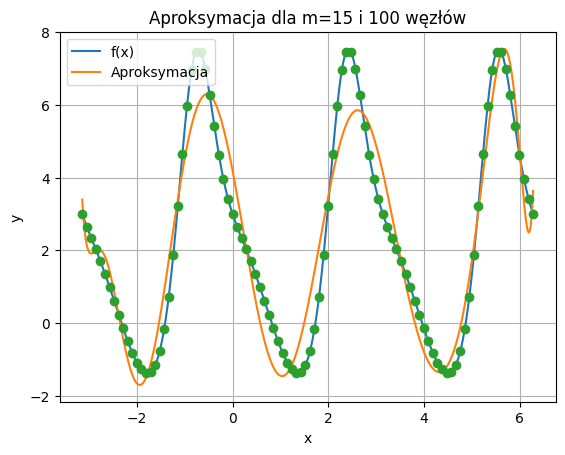

Dla m = 30:
Maksymalna różnica: 3.881297492035025
Błąd średni kwadratowy: 1.1993604105414093
----------------------------------------------------------------------


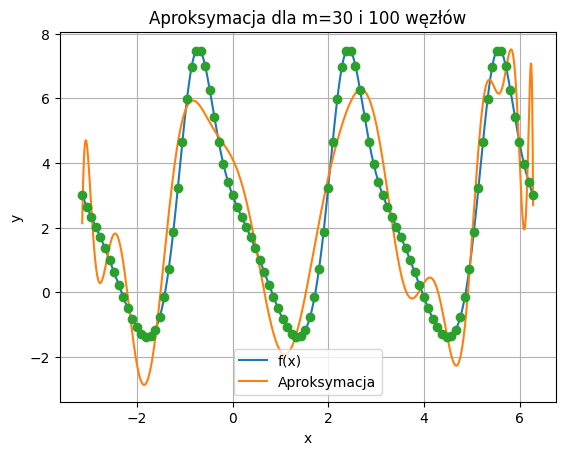


\noindent\begin{minipage}{\linewidth}
\centering
\begin{table}[H]
\centering
\begin{tabular}{c|c|c}
       m           & Maksymalna różnica & Średni błąd kwadratowy  \\
\hline
5 & 5.4670 & 7.0423 \\
8 & 4.4903 & 2.5151 \\
15 & 2.0018 & 0.6929 \\
30 & 3.8813 & 1.1994 \\

\end{tabular}
\captionsetup{justification=centering}
\caption{Porównanie błędów i maksymalnych różnic dla aproksymacji wielomianowej dla różnych wartości m przy 100 węzłach.}
\end{table}
\end{minipage}


In [77]:
generate_summary(100, [5, 8, 15, 30])

Minimalna wartość maksymalnej różnicy: 0.5689947230633634
n: 93
m: 32


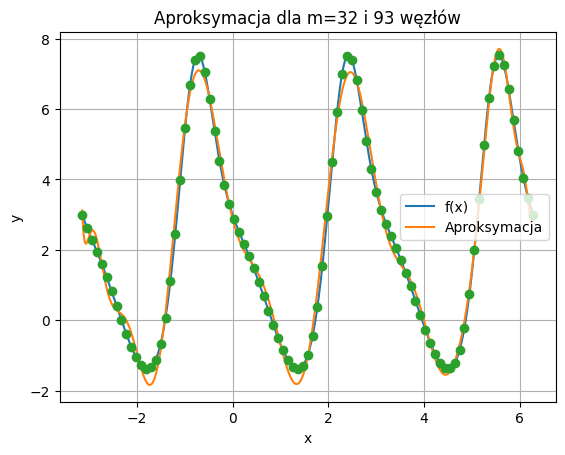

In [78]:
n_min = 2
m_min = 2
value = 100
for n in range(2, 101):
    for m in range(2, n):
        x_nodes, y_nodes = generate_regular(a, b, g, n)
        f = approx(x_nodes, y_nodes, m)
        max_diff_f = max_diff(f, f=g, points=thousand_test_points)
        if max_diff_f < value:
            value = max_diff_f
            n_min = n
            m_min = m
print(f"Minimalna wartość maksymalnej różnicy: {value}")
print(f"n: {n_min}")
print(f"m: {m_min}")
pr = generate_regular(a, b, g, n_min)
f = approx(pr[0], pr[1], m_min)
fun_painter([g, f], ['f(x)', 'Aproksymacja'], points=(pr[0], pr[1]), title=f"Aproksymacja dla m={m_min} i {n_min} węzłów")

Minimalna wartość błędu średniego kwadratowego: 0.06182797230722421
n: 90
m: 40


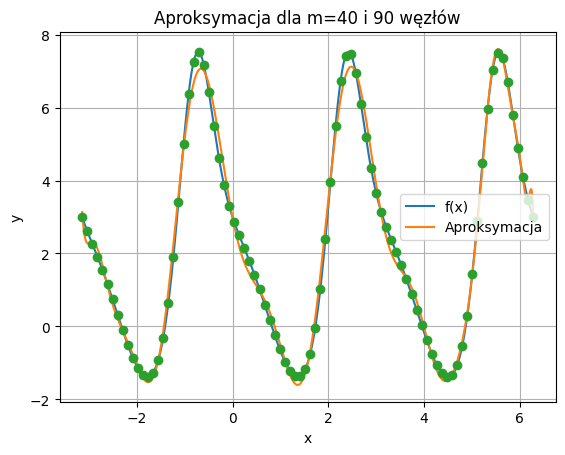

In [79]:
n_min = 2
m_min = 2
value = 100
for n in range(2, 101):
    for m in range(2, n):
        x_nodes, y_nodes = generate_regular(a, b, g, n)
        f = approx(x_nodes, y_nodes, m)
        sum_diff_f = sum_diff(f, f=g, points=thousand_test_points)
        if sum_diff_f < value:
            value = sum_diff_f
            n_min = n
            m_min = m
print(f"Minimalna wartość błędu średniego kwadratowego: {value}")
print(f"n: {n_min}")
print(f"m: {m_min}")
pr = generate_regular(a, b, g, n_min)
f = approx(pr[0], pr[1], m_min)
fun_painter([g, f], ['f(x)', 'Aproksymacja'], points=(pr[0], pr[1]), title=f"Aproksymacja dla m={m_min} i {n_min} węzłów")